<a href="https://colab.research.google.com/github/jahu/machine-learning/blob/master/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Function to generate energy consumption
def generate_consumption(day_of_week):
    if day_of_week < 5:  # Weekdays
        base_consumption = np.random.uniform(95, 105)
        noise = np.random.normal(0, 5)  # Adding normal distributed noise
        return max(0, base_consumption + noise)  # Ensure the result is non-negative
    else:  # Weekends
        base_consumption = np.random.uniform(0, 0.1)
        noise = np.random.normal(0, 0.05)  # Adding normal distributed noise
        return max(0, base_consumption + noise)  # Ensure the result is non-negative


# Date range for the entire year 2022
date_range = pd.date_range(start="1/1/2022", end="12/31/2022")

# Create a DataFrame
data = {
    "Date": date_range,
    "Day_of_Week": date_range.dayofweek,
    "Energy_Consumption": [generate_consumption(day) for day in date_range.dayofweek]
}

df = pd.DataFrame(data)

# Calculating the cumulative energy consumption for each month
df['YearMonth'] = df['Date'].dt.to_period('M')
df['Cumulative_Consumption'] = df.groupby('YearMonth').Energy_Consumption.cumsum()

df

,Date,Day_of_Week,Energy_Consumption,YearMonth,Cumulative_Consumption
0,2022-01-01,5,0.037236,2022-01,0.037236
1,2022-01-02,6,0.100001,2022-01,0.137237
2,2022-01-03,0,107.285427,2022-01,107.422665
3,2022-01-04,1,103.470665,2022-01,210.893329
4,2022-01-05,2,95.437835,2022-01,306.331164
...,...,...,...,...,...
360,2022-12-27,1,109.830521,2022-12,1902.230304
361,2022-12-28,2,94.886846,2022-12,1997.117150
362,2022-12-29,3,108.319109,2022-12,2105.436259
363,2022-12-30,4,100.095067,2022-12,2205.531325


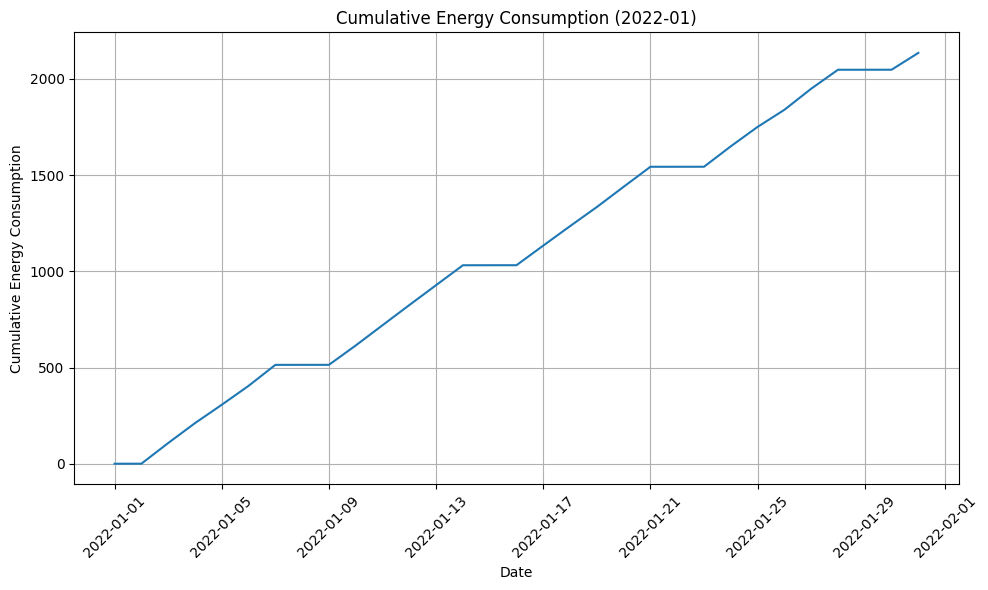

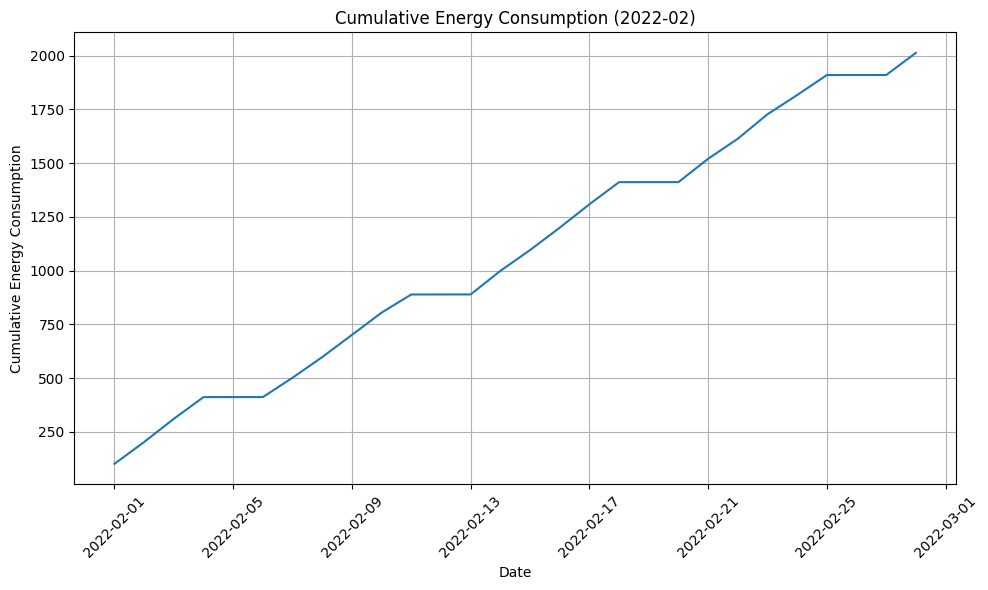

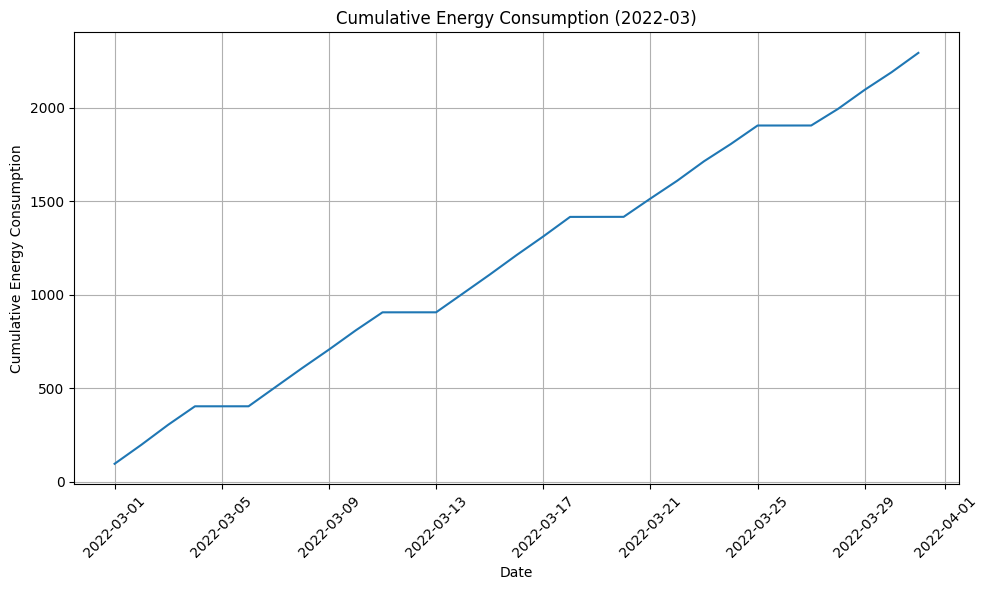

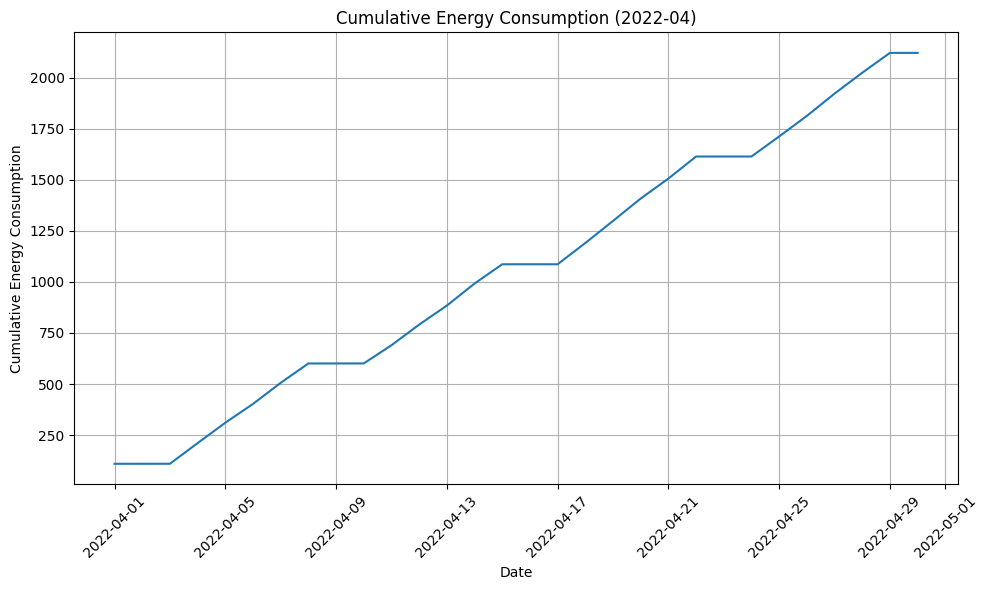

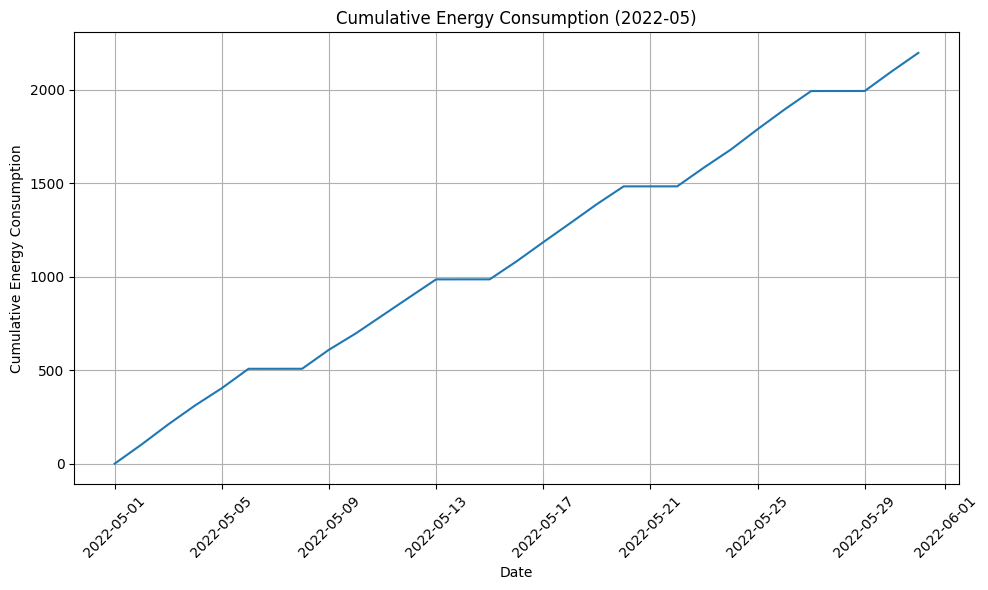

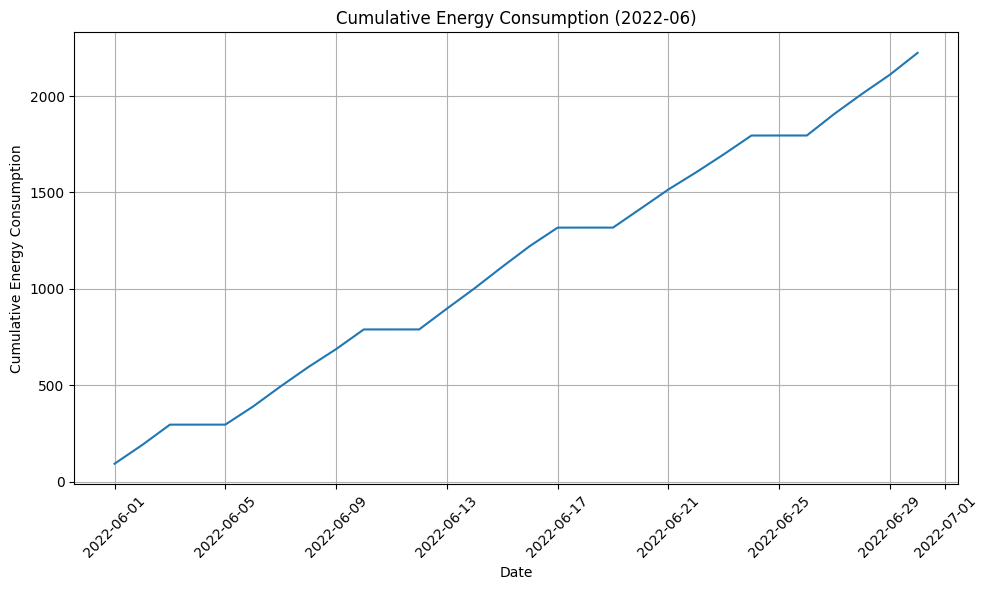

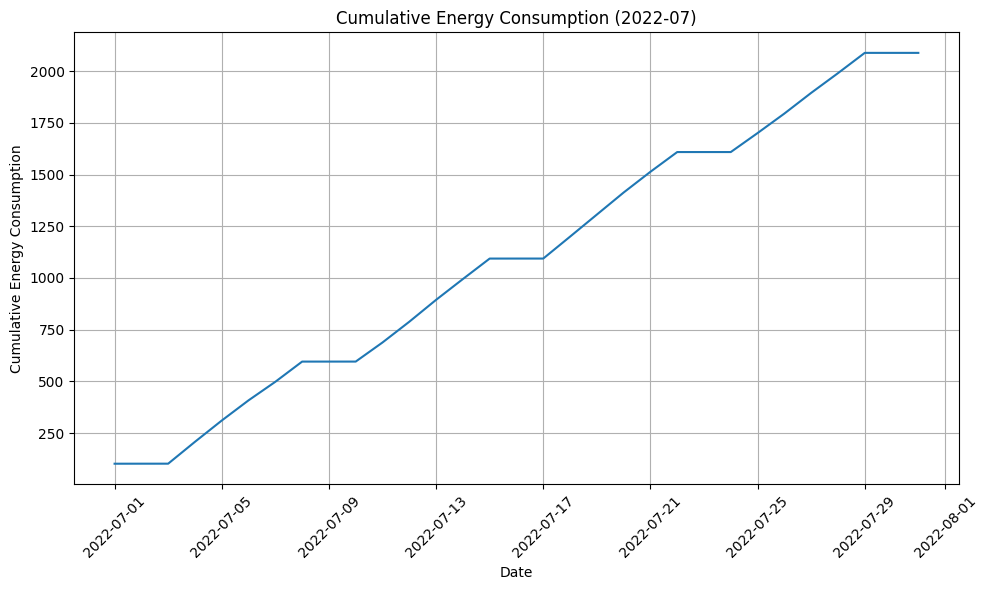

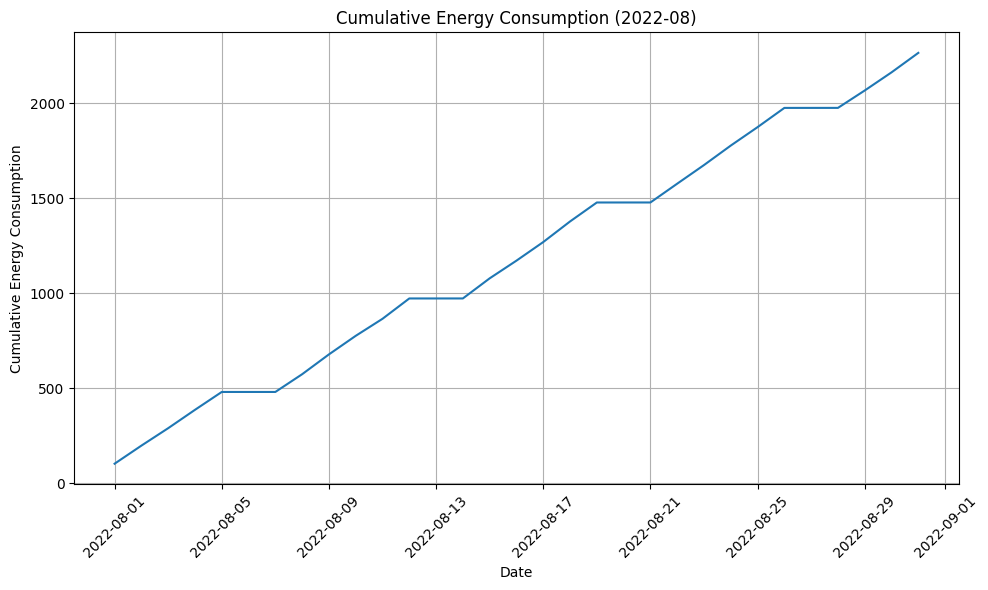

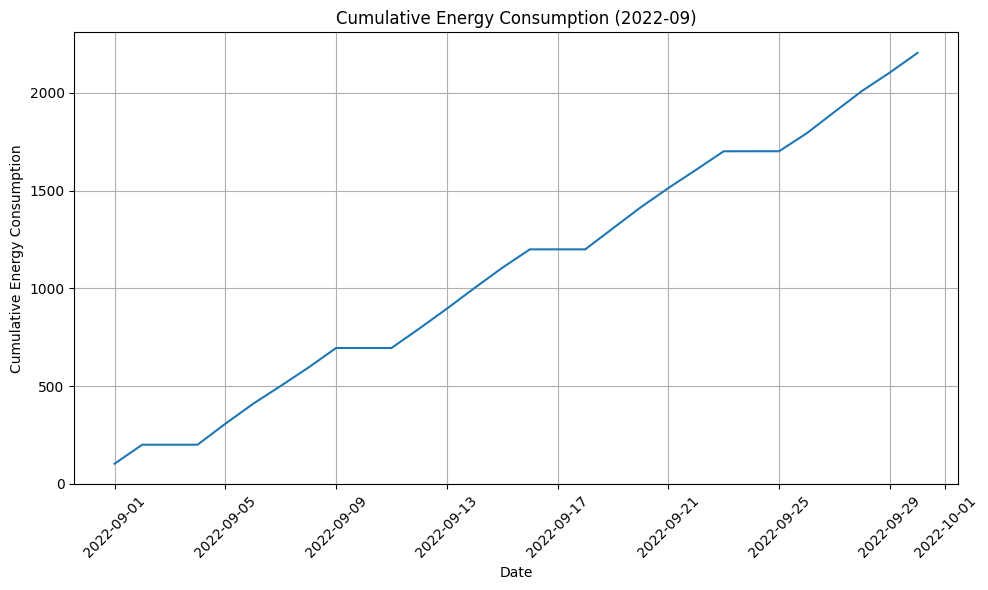

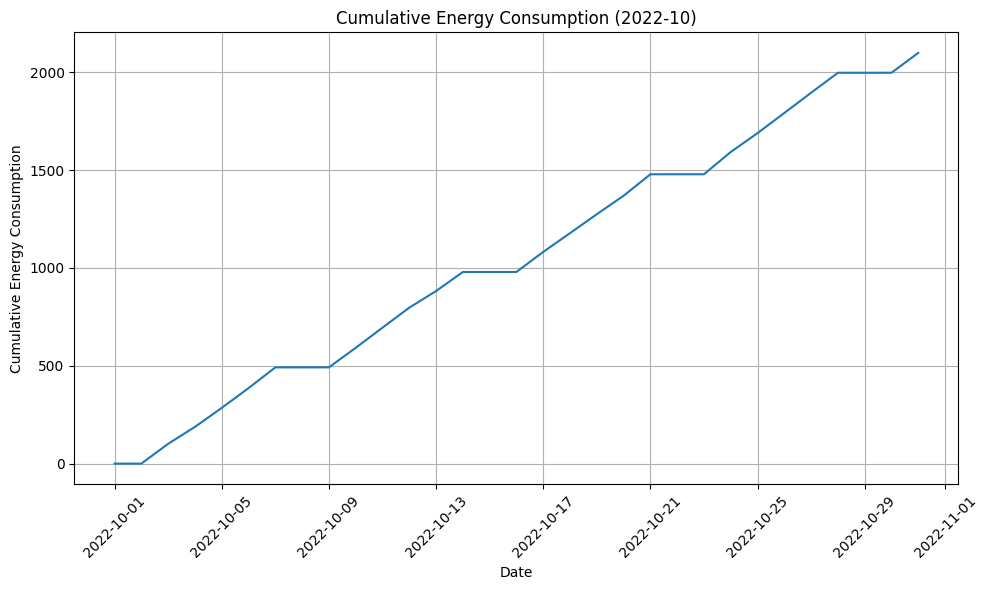

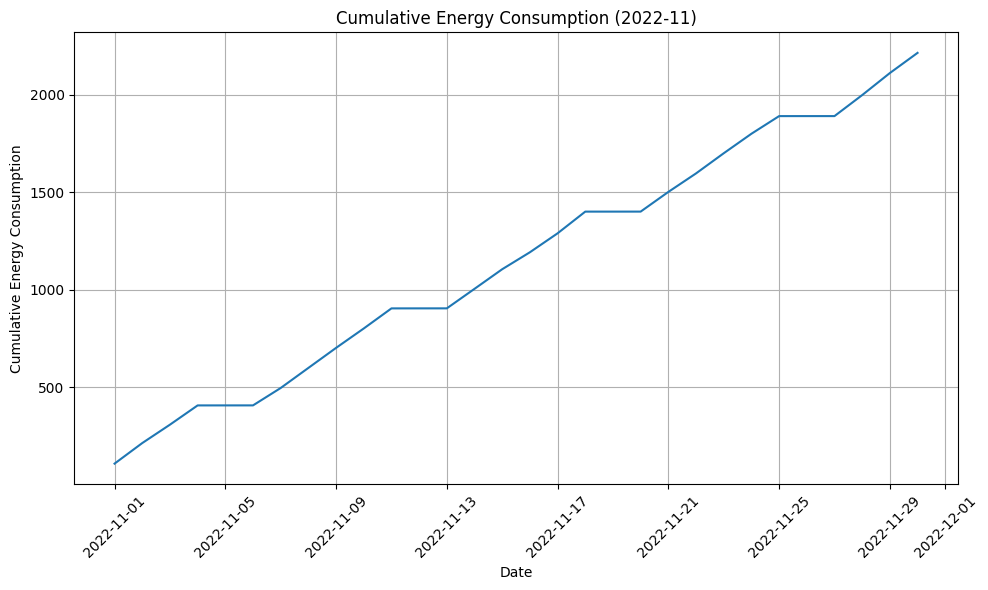

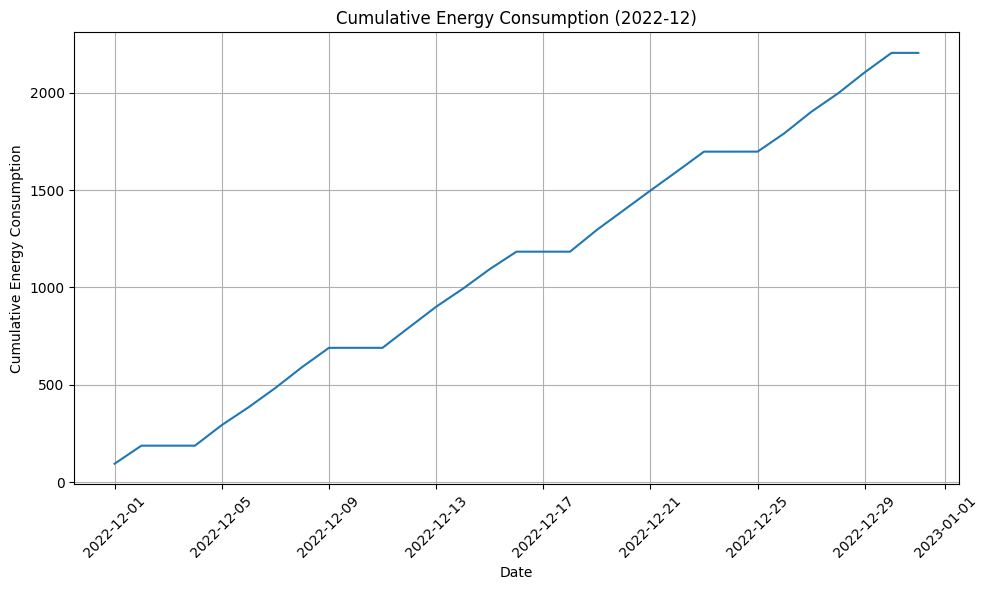

In [35]:
# Loop through each month and plot the cumulative energy consumption
for month, group in df.groupby('YearMonth'):
    plt.figure(figsize=(10, 6))
    plt.plot(group['Date'], group['Cumulative_Consumption'])
    plt.title(f'Cumulative Energy Consumption ({month})')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Energy Consumption')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi_co1e4u/jdaeyd3e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi_co1e4u/ek3ygfed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89265', 'data', 'file=/tmp/tmpi_co1e4u/jdaeyd3e.json', 'init=/tmp/tmpi_co1e4u/ek3ygfed.json', 'output', 'file=/tmp/tmpi_co1e4u/prophet_model2fw8my_6/prophet_model-20231006091109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


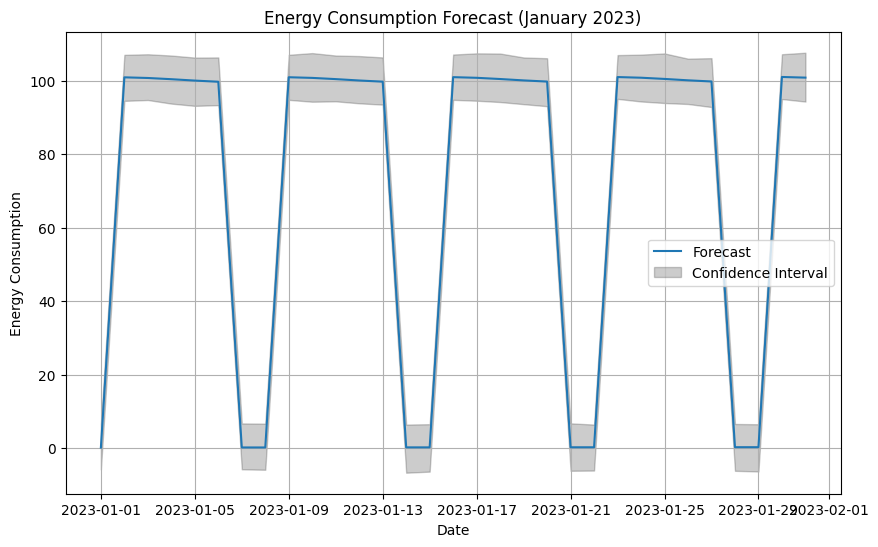

In [36]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = df[['Date', 'Energy_Consumption']]
prophet_data.columns = ['ds', 'y']

# Create and fit the model
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(prophet_data)

# Create a DataFrame for future dates (January 2023)
future_dates = model.make_future_dataframe(periods=31, freq='D')

# Predict energy consumption
forecast = model.predict(future_dates)

# Filter the forecast DataFrame to only include January 2023
forecast_jan_2023 = forecast.loc[forecast['ds'] >= '2023-01-01']

# Plot the forecast for January 2023
plt.figure(figsize=(10, 6))
plt.plot(forecast_jan_2023['ds'], forecast_jan_2023['yhat'], label='Forecast')
plt.fill_between(forecast_jan_2023['ds'], forecast_jan_2023['yhat_lower'], forecast_jan_2023['yhat_upper'], color='k', alpha=0.2, label='Confidence Interval')
plt.title('Energy Consumption Forecast (January 2023)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()


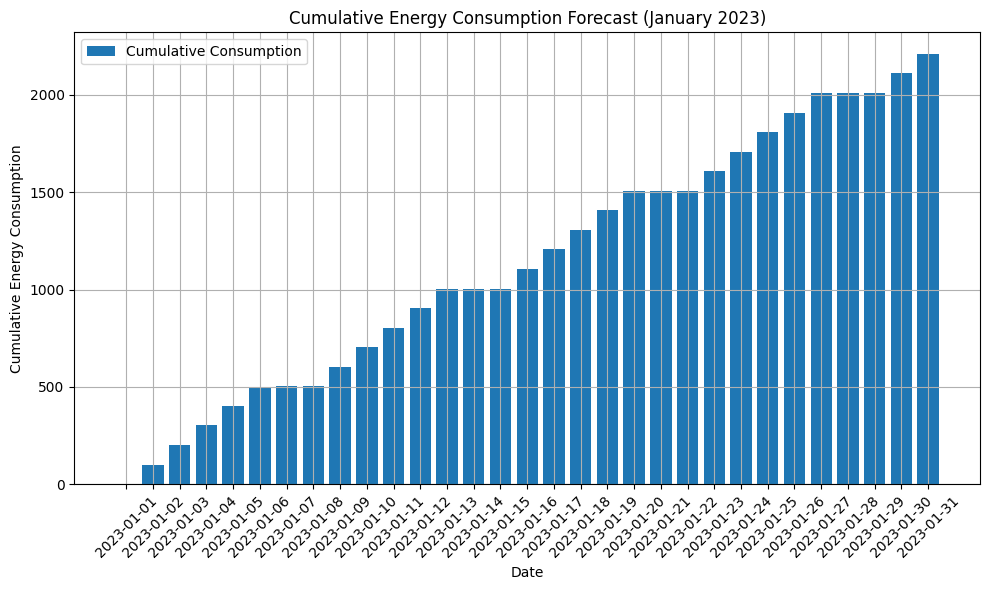

In [37]:
# Calculate the cumulative energy consumption for January 2023
forecast_jan_2023 = forecast_jan_2023.assign(Cumulative_Consumption=forecast_jan_2023['yhat'].cumsum())

# Plot the cumulative energy consumption for January 2023
plt.figure(figsize=(10, 6))
plt.bar(forecast_jan_2023['ds'].dt.strftime('%Y-%m-%d'), forecast_jan_2023['Cumulative_Consumption'], label='Cumulative Consumption')
plt.title('Cumulative Energy Consumption Forecast (January 2023)')
plt.xlabel('Date')
plt.ylabel('Cumulative Energy Consumption')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Optional: rotate the x-axis labels for better readability
plt.tight_layout()  # Optional: adjust the layout to prevent clipping of labels
plt.show()


Epoch 1/50
8/8 [==============================] - 2s 74ms/step - loss: 0.5867 - val_loss: 0.5256
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4834 - val_loss: 0.4351
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3988 - val_loss: 0.3516
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3162 - val_loss: 0.2613
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2209 - val_loss: 0.1682
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.1531 - val_loss: 0.1558
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.1536 - val_loss: 0.1427
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.1405 - val_loss: 0.1400
Epoch 9/50
8/8 [==============================] - 0s 6ms/step - loss: 0.1370 - val_loss: 0.1337
Epoch 10/50
8/8 [==============================] - 0s 12ms/step - loss: 0.1301 - val_loss: 0.1290
Epoch 11/50
8/8 [====================

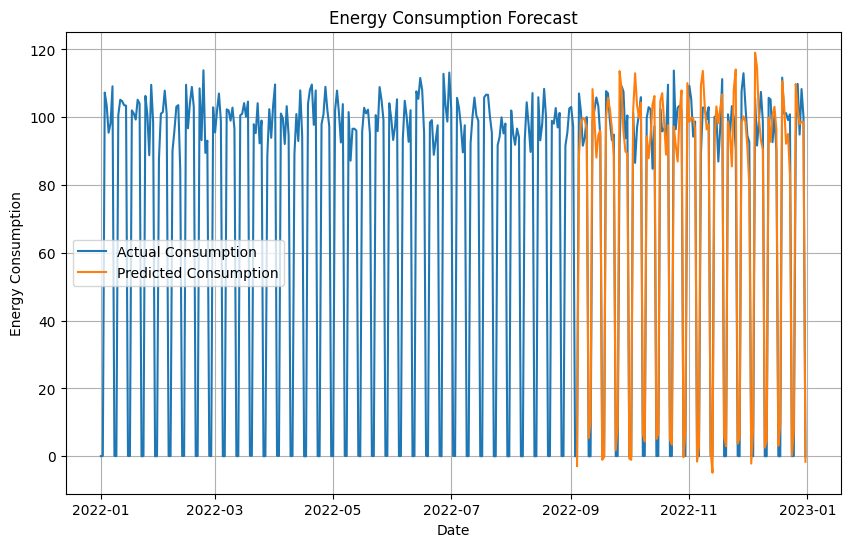

In [38]:
# PREDICTION WITH LSTM
import tensorflow as tf


# Prepare the data for the LSTM
# Normalize the data (optional but often helpful)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Scaled_Consumption'] = scaler.fit_transform(df[['Energy_Consumption']])

# Create sequences of data to be used by the LSTM
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length:i+seq_length+1]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

seq_length = 7  # Use a week of data to predict the next day's consumption
X, y = create_sequences(df['Scaled_Consumption'].values, seq_length)

# Split data into training and testing sets
train_size = int(0.67 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Make predictions
predicted_consumption = model.predict(X_test)
predicted_consumption = scaler.inverse_transform(predicted_consumption)  # Un-normalize the predictions

# For plotting purposes, create a new DataFrame containing the original date range and the predicted consumption
prediction_dates = df['Date'].iloc[train_size + seq_length:]
predicted_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_Consumption': predicted_consumption.flatten()})

# Plot the actual and predicted consumption
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Energy_Consumption'], label='Actual Consumption')
plt.plot(predicted_df['Date'], predicted_df['Predicted_Consumption'], label='Predicted Consumption')
plt.title('Energy Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()
